## Trabalho de Inteligencia Artificial
### Rede KNN *(K-NEAREST NEIGHBORS)*

#### Integrantes:
* Lucas Machado Marinho - 11916645
* Pedro Augusto Luiz - 11911935
* Renan de Almeida Leandro - 118
* Weverton Samuel Alves - 119

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import math

In [2]:
def gera_vertices(n):
    vertices = []
    random.seed(9)
    
    for i in range(n):
        x = random.randrange(0,n)
        y = random.randrange(0,n)
        vertices.append((x, y))
    return vertices

In [3]:
def distancia_euclidiana(v1, v2):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(v1, v2)]))

In [4]:
def gera_arestas(lista_vertices, k):
    arestas = []
    for i, v1 in enumerate(lista_vertices):
        
        distancias = []
        for j, v2 in enumerate(lista_vertices):
            if i != j:
                dist = distancia_euclidiana(v1, v2)
                distancias.append((j, dist))
        
        #Ordena pela distancia em ordem crescente
        distancias.sort(key=lambda x: x[1])
        
        for j, dist in distancias[:k]:
            arestas.append((i, j, round(dist, 2)))
    return arestas

In [5]:
def gera_rede_knn(n, k):
    lista_vertices = gera_vertices(n)
    lista_arestas = gera_arestas(lista_vertices, k)
    return lista_vertices, lista_arestas

In [6]:
# gerar a rede
lista_vertices, lista_arestas = gera_rede_knn(100, 3)

In [7]:
lista_vertices_index = []

In [8]:
for i, val in enumerate(lista_vertices):
    #print(str(i) + '-' + str(val))
    lista_vertices_index.append(i)

In [9]:
#lista_arestas

In [10]:
def verificaVizinhoK(no):
    for i in lista_arestas:
        if i[0] == no:
            print(i)
            
def verificaVizinhoTot(no):
    for i in lista_arestas:
        if (i[0] == no) or (i[1] == no):
            print(i)

In [11]:
#verificaVizinhoK(0)

In [12]:
#verificaVizinhoTot(0)

[(0, 5), (0, 41), (0, 7), (0, 11), (5, 41), (5, 69), (5, 7), (41, 80), (41, 61), (7, 61), (7, 48), (7, 83), (1, 99), (1, 56), (1, 73), (99, 73), (99, 56), (56, 73), (56, 98), (73, 98), (2, 47), (2, 13), (2, 93), (2, 26), (47, 13), (47, 72), (13, 72), (13, 19), (93, 14), (93, 26), (3, 27), (3, 8), (3, 68), (3, 33), (27, 8), (27, 68), (8, 68), (8, 32), (8, 45), (68, 32), (68, 45), (4, 29), (4, 65), (4, 87), (4, 50), (4, 88), (29, 87), (29, 65), (29, 80), (65, 87), (65, 80), (87, 80), (87, 88), (69, 88), (69, 75), (6, 63), (6, 19), (6, 43), (63, 19), (63, 43), (63, 78), (63, 84), (43, 84), (43, 78), (61, 51), (61, 60), (9, 59), (9, 90), (9, 23), (59, 23), (59, 90), (59, 82), (90, 23), (90, 35), (90, 82), (90, 85), (23, 82), (23, 85), (10, 91), (10, 52), (10, 55), (10, 21), (91, 20), (91, 44), (91, 55), (52, 34), (52, 55), (52, 86), (55, 34), (55, 86), (11, 18), (11, 81), (11, 83), (18, 81), (18, 53), (81, 53), (81, 75), (12, 71), (12, 98), (12, 89), (71, 22), (71, 28), (89, 22), (89, 28),

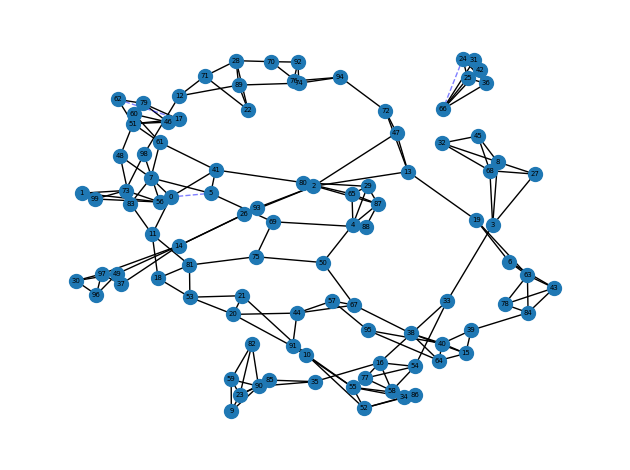

In [13]:
G = nx.Graph()

for u, v, dist in lista_arestas:
    #(str(u) + ' ' + str(v) + ' ' +str(dist))
    G.add_edge(u, v, weight=dist)
    
print(G.edges)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 1]

#pos = nx.circular_layout(G)
#pos = nx.spring_layout(G) 
pos = nx.spring_layout(G, seed=9, k=1, iterations=100, scale=10)  # positions for all nodes - seed for reproducibility
#pos = nx.kamada_kawai_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=100)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=5)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

<strong>__________________________________________________________________________________________________</strong>

### Busca em Profundidade

In [14]:
def dfs(grafo, vertice_inicial, vertice_final):
    visitados = set()
    caminho = []

    def dfs_recursiva(grafo, vertice, caminho_atual):
        visitados.add(vertice)
        caminho_atual.append(vertice)

        if vertice == vertice_final:
            return caminho_atual

        for vizinho in grafo[vertice]:
            if vizinho not in visitados:
                resultado = dfs_recursiva(grafo, vizinho, caminho_atual)
                if resultado is not None:
                    return resultado

        caminho_atual.pop()

    caminho = dfs_recursiva(grafo, vertice_inicial, [])
    return caminho

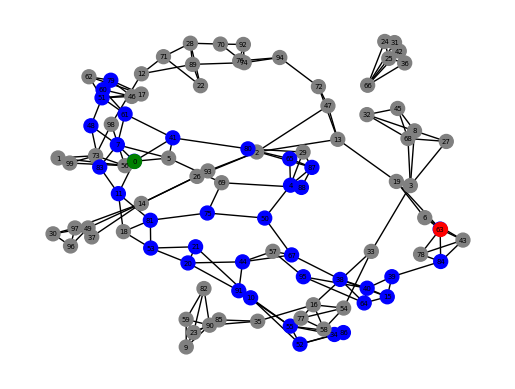

[0, 11, 83, 7, 48, 51, 79, 60, 61, 41, 80, 65, 87, 88, 4, 50, 75, 81, 53, 20, 21, 10, 55, 91, 44, 67, 38, 40, 95, 64, 15, 39, 84, 63]


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

caminhoTot = ''

def dfs_com_pesos(G, origem, destino):
    caminho = []
    visitados = set()
    pilha = [(origem, [origem], 0)]
    
    while pilha:
        (vertice, caminho_atual, peso) = pilha.pop()
        if vertice == destino:
            caminho = caminho_atual
            visitados.add(vertice)
            break
        if vertice not in visitados:
            visitados.add(vertice)
            #print('\t' + str(vertice))
            #print(G[vertice][5])
            for vizinho in G[vertice]:
                #print(vizinho)
                peso_vizinho = G.edges[(vertice, vizinho)]['weight']
                pilha.append((vizinho, caminho_atual + [vizinho], peso + peso_vizinho))
            #print('\n')

    # Desenha o grafo com os vértices visitados destacados
    pos = nx.spring_layout(G, seed=9, k=1, iterations=100, scale=10)
    labels = {v: v for v in G.nodes()}
    cores_vertices = ['green' if v == origem else 'red' if v == destino else 'gray' for v in G.nodes()]
    cores_visitados = ['blue' if v in visitados else 'gray' for v in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_color=cores_visitados, node_size=100)
    nx.draw_networkx_edges(G, pos, width=1)
    nx.draw_networkx_labels(G, pos, labels, font_size=5, font_family='sans-serif')
    
    # Marca o nó origem e destino
    nx.draw_networkx_nodes(G, pos, nodelist=[origem], node_color='green', node_size=100)
    nx.draw_networkx_nodes(G, pos, nodelist=[destino], node_color='red', node_size=100)

    plt.axis('off')
    plt.show()
    
    caminhoTot = caminho
    
    print(caminho)

# Cria o grafo
G = nx.Graph()
for u, v, dist in lista_arestas:
    G.add_edge(u, v, weight=dist)

# Define o nó de origem e o nó de destino
origem = 0
destino = 63

# Executa a busca em profundidade
dfs_com_pesos(G, origem, destino)

[0, 5, 41, 80, 87, 4, 50, 67, 57, 95, 40, 15, 39, 84, 43, 6, 63]


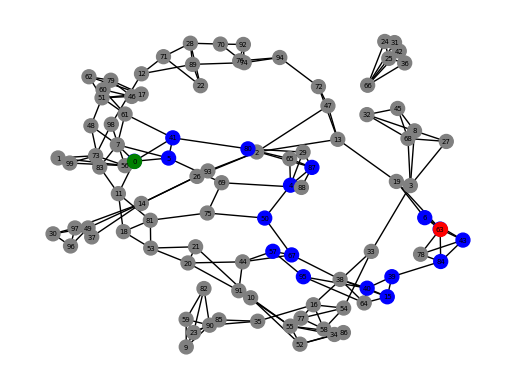

In [38]:
# Executa a busca em profundidade
caminho = dfs(G, origem, destino)

print(caminho)

# Desenha o grafo com os vértices visitados destacados
pos = nx.spring_layout(G, seed=9, k=1, iterations=100, scale=10)
labels = {v: v for v in G.nodes()}
cores_vertices = ['green' if v == origem else 'red' if v == destino else 'gray' for v in G.nodes()]
cores_visitados = ['blue' if v in caminho else 'gray' for v in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=cores_visitados, node_size=100)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, labels, font_size=5, font_family='sans-serif')

# Marca o nó origem e destino
nx.draw_networkx_nodes(G, pos, nodelist=[origem], node_color='green', node_size=100)
nx.draw_networkx_nodes(G, pos, nodelist=[destino], node_color='red', node_size=100)

plt.axis('off')
plt.show()

In [17]:
#lista_vertices

In [18]:
#lista_arestas

<strong>__________________________________________________________________________________________________</strong>

### Busca em largura

Caminho encontrado: [0, 5, 69, 75, 50, 67, 38, 15, 39, 84, 63]


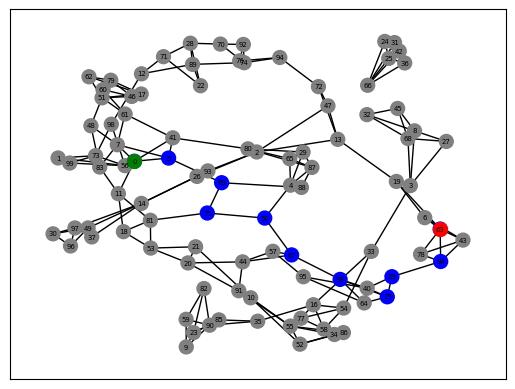

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs(vertices, arestas, start, end):
    graph = {}
    for vertex in vertices:
        graph[vertex] = []

    for edge in arestas:
        u, v, weight = edge
        graph[u].append((v, weight))
        graph[v].append((u, weight))

    visited = set()
    queue = deque()
    queue.append((start, [start]))

    # Cria um grafo vazio
    G = nx.Graph()
    # Cria o grafo
    for u, v, dist in lista_arestas:
        G.add_edge(u, v, weight=dist)

    while queue:
        vertex, path = queue.popleft()
        visited.add(vertex)

        if vertex == end:
            return path, G

        for neighbor, weight in graph[vertex]:
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
                G.add_edge(vertex, neighbor, weight=weight)

    return None, G


# Exemplo de lista de vértices, lista de arestas com peso e vértices de origem e destino
vertices = lista_vertices_index
arestas = lista_arestas
start_vertex = 0
end_vertex = 63

path, G = bfs(vertices, arestas, start_vertex, end_vertex)

if path:
    print(f"Caminho encontrado: {path}")
    pos = nx.spring_layout(G, seed=9, k=1, iterations=100, scale=10)

    labels = {v: v for v in G.nodes()}
    cores_vertices = ['green' if v == origem else 'red' if v == destino else 'gray' for v in G.nodes()]
    cores_visitados = ['blue' if v in path else 'gray' for v in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_color=cores_visitados, node_size=100)
    nx.draw_networkx_edges(G, pos, width=1)
    nx.draw_networkx_labels(G, pos, labels, font_size=5, font_family='sans-serif')

    # Marca o nó origem e destino
    nx.draw_networkx_nodes(G, pos, nodelist=[origem], node_color='green', node_size=100)
    nx.draw_networkx_nodes(G, pos, nodelist=[destino], node_color='red', node_size=100)
    plt.show()
else:
    print("Nenhum caminho encontrado.")

<strong>__________________________________________________________________________________________________</strong>

### Algoritmo Best-First

In [41]:
from queue import PriorityQueue

def best_first_search(vertices, edges, source, target):
    n = len(vertices)
    graph = [[] for _ in range(n)]

    for u, v, cost in edges:
        graph[u].append((v, cost))
        graph[v].append((u, cost))

    visited = [False] * n
    pq = PriorityQueue()
    pq.put((0, source))
    visited[source] = True

    while not pq.empty():
        u = pq.get()[1]
        print(u, end=" ")
        if u == target:
            break

        for v, c in graph[u]:
            if not visited[v]:
                visited[v] = True
                pq.put((c, v))
    print()

# Exemplo de lista de vértices, lista de arestas com pesos, vértice inicial e vértice final
vertices = lista_vertices_index
edges = lista_arestas

source = 0
target = 63

best_first_search(vertices, edges, source, target)


0 5 41 80 87 29 88 4 65 7 69 75 81 18 53 21 10 91 52 34 55 86 44 57 95 64 38 40 67 15 20 50 39 84 43 78 6 19 63 


<strong>__________________________________________________________________________________________________</strong>

### Algoritmo A*

<strong>__________________________________________________________________________________________________</strong>

### Algoritmo Dijkstra